Minimum pixel intensity: 0.0
Maximum pixel intensity: 255.0


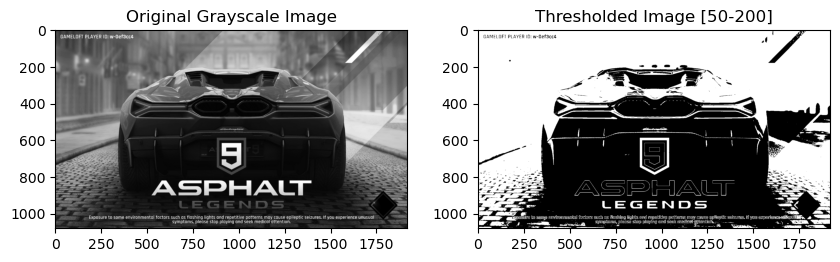

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('C:\\Users\\yasha\\OneDrive\\Desktop\\CV LAB\\Screenshot (1).png')

# Step 2: Convert the image to grayscale (if it's not already grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Find the minimum and maximum pixel intensity values
min_val, max_val, _, _ = cv2.minMaxLoc(gray_image)
print(f"Minimum pixel intensity: {min_val}")
print(f"Maximum pixel intensity: {max_val}")

# Step 4: Apply manual threshold (you can change the threshold values)
threshold_min = 50  # Set your own minimum threshold value
threshold_max = 200  # Set your own maximum threshold value

# Apply thresholding
_, binary_image = cv2.threshold(gray_image, threshold_min, 255, cv2.THRESH_BINARY)
_, binary_max = cv2.threshold(gray_image, threshold_max, 255, cv2.THRESH_BINARY_INV)

# Combine the two thresholds
thresholded_image = cv2.bitwise_and(binary_image, binary_max)

# Step 5: Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Thresholded Image [{threshold_min}-{threshold_max}]')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

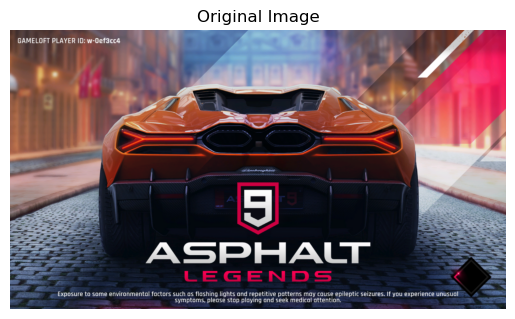

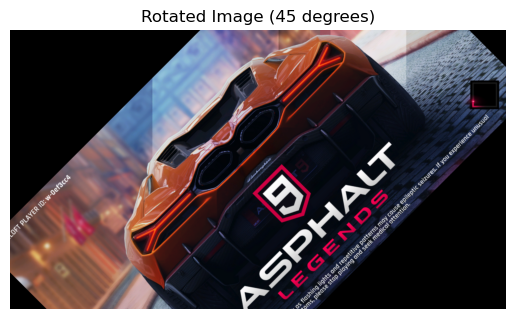

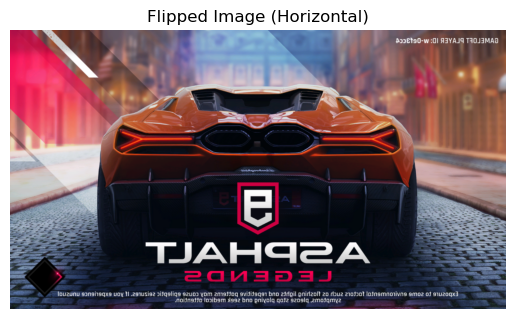

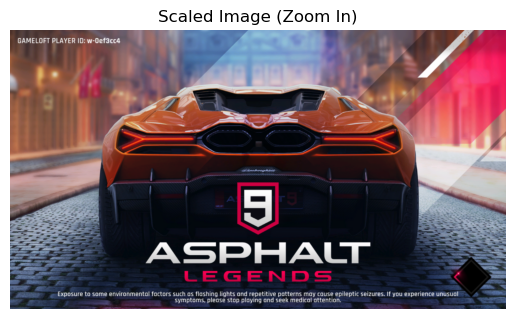

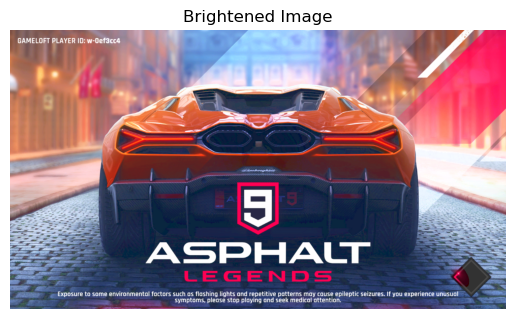

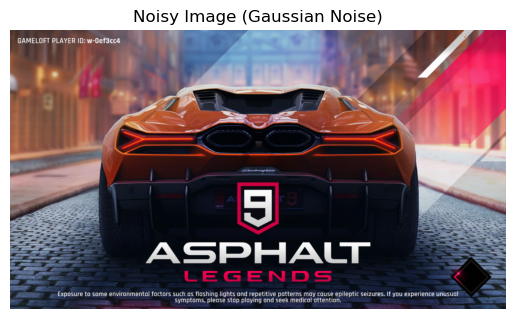

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:\\Users\\yasha\\OneDrive\\Desktop\\CV LAB\\Screenshot (1).png')

# Function to display images using matplotlib (for better visualization)
def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV) to RGB (for Matplotlib)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Augmentation 1: Rotate the image
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(img, rotation_matrix, (w, h))
    return rotated_image

# Augmentation 2: Flip the image
def flip_image(img, flip_code):
    flipped_image = cv2.flip(img, flip_code)
    return flipped_image

# Augmentation 3: Scale the image (zoom in/out)
def scale_image(img, scale_factor):
    h, w = img.shape[:2]
    scaled_image = cv2.resize(img, (int(w * scale_factor), int(h * scale_factor)))
    return scaled_image

# Augmentation 4: Adjust brightness
def adjust_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    bright_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Augmentation 5: Add Gaussian noise
def add_gaussian_noise(img, mean=0, var=10):
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, img.shape)
    noisy_image = img + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Display original image
show_image(image, "Original Image")

# Apply augmentations
rotated_image = rotate_image(image, 45)
show_image(rotated_image, "Rotated Image (45 degrees)")

flipped_image = flip_image(image, 1)  # 0: vertical, 1: horizontal, -1: both
show_image(flipped_image, "Flipped Image (Horizontal)")

scaled_image = scale_image(image, 1.5)  # Scaling factor > 1 for zoom in, < 1 for zoom out
show_image(scaled_image, "Scaled Image (Zoom In)")

bright_image = adjust_brightness(image, 50)  # Adjust brightness by 50
show_image(bright_image, "Brightened Image")

noisy_image = add_gaussian_noise(image)
show_image(noisy_image, "Noisy Image (Gaussian Noise)")

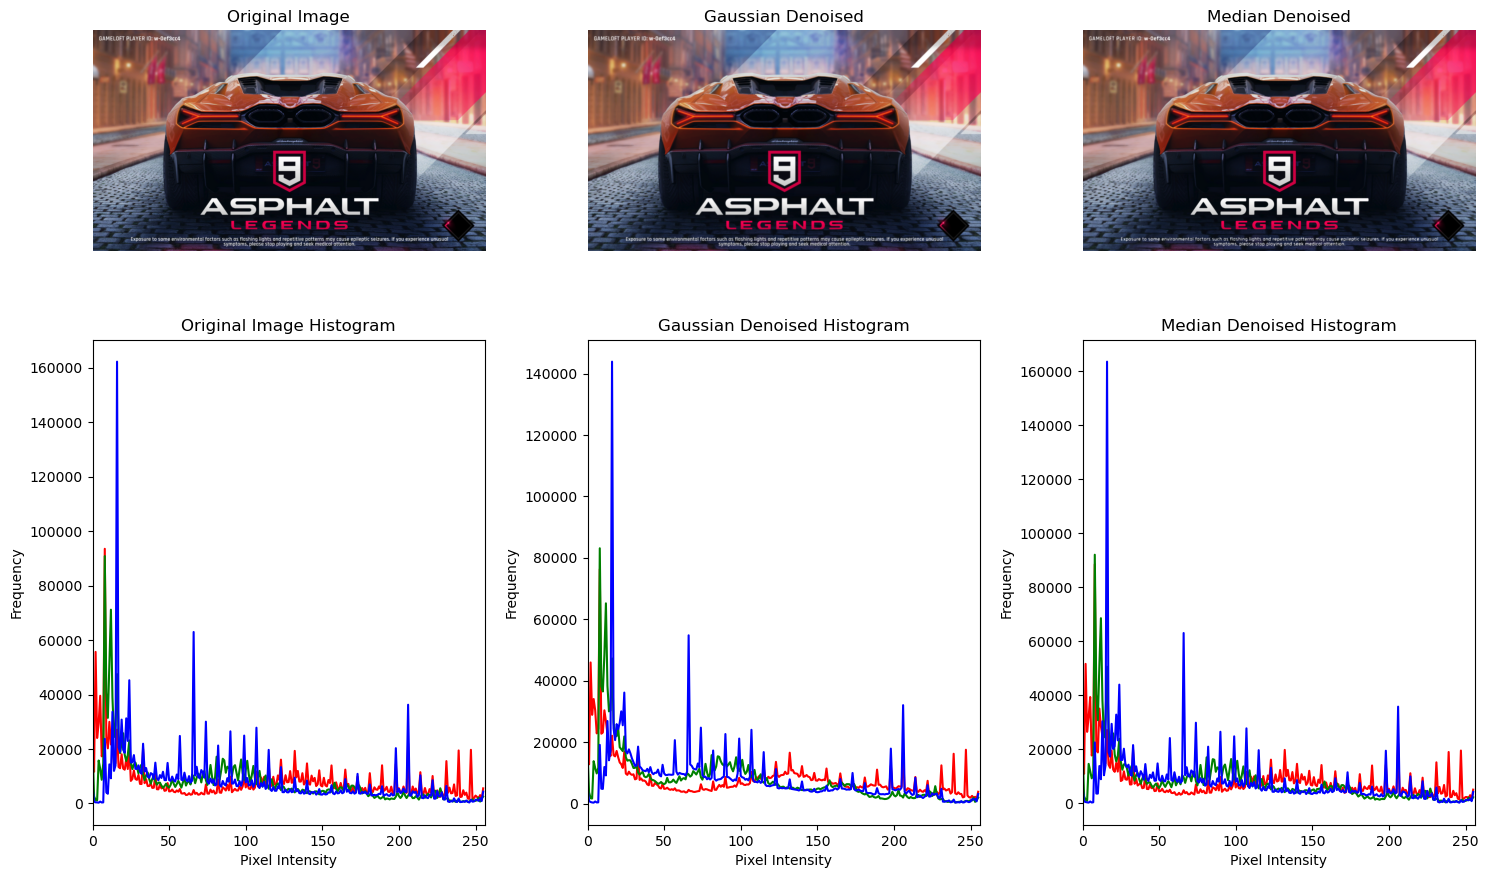

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:\\Users\\yasha\\OneDrive\\Desktop\\CV LAB\\Screenshot (1).png')

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian filter for denoising
gaussian_denoised = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Apply Median filter for denoising
median_denoised = cv2.medianBlur(image_rgb, 5)

# Function to plot histogram
def plot_histogram(image, title):
    # Split the image into color channels
    color = ('r', 'g', 'b')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Display the original and denoised images using matplotlib
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Display the image denoised by Gaussian filter
plt.subplot(2, 3, 2)
plt.imshow(gaussian_denoised)
plt.title("Gaussian Denoised")
plt.axis('off')

# Display the image denoised by Median filter
plt.subplot(2, 3, 3)
plt.imshow(median_denoised)
plt.title("Median Denoised")
plt.axis('off')

# Plot histogram for the original image
plt.subplot(2, 3, 4)
plot_histogram(image_rgb, 'Original Image Histogram')

# Plot histogram for the Gaussian denoised image
plt.subplot(2, 3, 5)
plot_histogram(gaussian_denoised, 'Gaussian Denoised Histogram')

# Plot histogram for the Median denoised image
plt.subplot(2, 3, 6)
plot_histogram(median_denoised, 'Median Denoised Histogram')

# Show the plots
plt.tight_layout()
plt.show()